In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uppulurimadhuri/dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\alekshendra\.cache\kagglehub\datasets\uppulurimadhuri\dataset\versions\1


In [5]:
AutismDf= pd.read_csv(path + "/data_csv.csv")

In [6]:
AutismDf

,CASE_NO_PATIENT'S,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,Global developmental delay/intellectual disability,Social/Behavioural Issues,Childhood Autism Rating Scale,Anxiety_disorder,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits
0,1,0,0,0,0,0,0,1,1,0,...,Yes,Yes,1,Yes,F,middle eastern,Yes,No,Family Member,No
1,2,1,1,0,0,0,1,1,0,0,...,Yes,Yes,2,Yes,M,White European,Yes,No,Family Member,Yes
2,3,1,0,0,0,0,0,1,1,0,...,Yes,Yes,4,Yes,M,Middle Eastern,Yes,No,Family Member,Yes
3,4,1,1,1,1,1,1,1,1,1,...,Yes,Yes,2,Yes,M,Hispanic,No,No,Family Member,Yes
4,5,1,1,0,1,1,1,1,1,1,...,Yes,Yes,1,Yes,F,White European,No,No,Family Member,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1980,1981,0,0,0,0,0,0,0,0,0,...,No,No,1,No,M,Middle Eastern,No,No,Health Care Professional,No
1981,1982,0,0,0,0,0,0,0,0,0,...,No,No,1,No,F,south asian,No,No,Health Care Professional,No
1982,1983,0,0,0,0,0,0,0,0,0,...,No,No,1,No,M,White European,No,No,Health Care Professional,Yes
1983,1984,0,0,0,0,0,0,0,0,0,...,No,No,1,No,M,Middle Eastern,No,No,Health Care Professional,No


In [7]:
AutismDf.drop(["CASE_NO_PATIENT'S"],  axis=1, inplace=True)

In [8]:
AutismDf.drop(["Childhood Autism Rating Scale"] , axis=1, inplace=True)

In [9]:
AutismDf.drop(["Who_completed_the_test"] , axis=1 , inplace=True)

In [10]:
AutismDf.drop(["Ethnicity"] , axis=1 , inplace=True)

In [11]:
AutismDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 24 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   A1                                                  1985 non-null   int64  
 1   A2                                                  1985 non-null   int64  
 2   A3                                                  1985 non-null   int64  
 3   A4                                                  1985 non-null   int64  
 4   A5                                                  1985 non-null   int64  
 5   A6                                                  1985 non-null   int64  
 6   A7                                                  1985 non-null   int64  
 7   A8                                                  1985 non-null   int64  
 8   A9                                                  1985 non-null   int64  
 9

In [12]:
AutismDf["Qchat_10_Score"]

0        3.0
1        4.0
2        4.0
3       10.0
4        9.0
        ... 
1980     6.0
1981     0.0
1982     6.0
1983     0.0
1984     6.0
Name: Qchat_10_Score, Length: 1985, dtype: float64

In [13]:
AutismDf.isnull().sum()

A1                                                     0
A2                                                     0
A3                                                     0
A4                                                     0
A5                                                     0
A6                                                     0
A7                                                     0
A8                                                     0
A9                                                     0
A10_Autism_Spectrum_Quotient                           0
Social_Responsiveness_Scale                            9
Age_Years                                              0
Qchat_10_Score                                        39
Speech Delay/Language Disorder                         0
Learning disorder                                      0
Genetic_Disorders                                      0
Depression                                             1
Global developmental delay/inte

In [14]:
AutismDf["Qchat_10_Score"] = AutismDf["Qchat_10_Score"].fillna(AutismDf["Qchat_10_Score"].mean())
AutismDf["Qchat_10_Score"] = AutismDf["Qchat_10_Score"].astype("int64")

In [15]:
AutismDf["Depression"].unique()

array(['Yes', 'No', nan], dtype=object)

In [16]:
AutismDf["Depression"] = AutismDf["Depression"].fillna("Yes")

In [17]:
AutismDf["Depression"].unique()

array(['Yes', 'No'], dtype=object)

In [18]:
from sklearn import preprocessing
label = preprocessing.LabelEncoder()

AutismDf["Depression"] = label.fit_transform(AutismDf["Depression"])




In [19]:
AutismDf["Social_Responsiveness_Scale"] = AutismDf["Social_Responsiveness_Scale"].fillna(AutismDf["Social_Responsiveness_Scale"].mean())
AutismDf["Social_Responsiveness_Scale"] = AutismDf["Social_Responsiveness_Scale"].astype("int64")
AutismDf["Social_Responsiveness_Scale"].unique()

array([ 3,  6,  7,  1,  5,  2,  0,  8,  4,  9, 10])

In [20]:
AutismDf["Social/Behavioural Issues"] = AutismDf["Social/Behavioural Issues"].fillna( method= "ffill" )
AutismDf["Social/Behavioural Issues"].unique()

C:\Users\alekshendra\AppData\Local\Temp\ipykernel_13804\901769262.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  AutismDf["Social/Behavioural Issues"] = AutismDf["Social/Behavioural Issues"].fillna( method= "ffill" )


array(['Yes', 'No'], dtype=object)

In [21]:
AutismDf.isnull().sum()

A1                                                    0
A2                                                    0
A3                                                    0
A4                                                    0
A5                                                    0
A6                                                    0
A7                                                    0
A8                                                    0
A9                                                    0
A10_Autism_Spectrum_Quotient                          0
Social_Responsiveness_Scale                           0
Age_Years                                             0
Qchat_10_Score                                        0
Speech Delay/Language Disorder                        0
Learning disorder                                     0
Genetic_Disorders                                     0
Depression                                            0
Global developmental delay/intellectual disabili

In [22]:
AutismDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 24 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   A1                                                  1985 non-null   int64 
 1   A2                                                  1985 non-null   int64 
 2   A3                                                  1985 non-null   int64 
 3   A4                                                  1985 non-null   int64 
 4   A5                                                  1985 non-null   int64 
 5   A6                                                  1985 non-null   int64 
 6   A7                                                  1985 non-null   int64 
 7   A8                                                  1985 non-null   int64 
 8   A9                                                  1985 non-null   int64 
 9   A10_Auti

In [23]:
AutismDf["Speech Delay/Language Disorder"] = label.fit_transform(AutismDf["Speech Delay/Language Disorder"])
AutismDf["Learning disorder"] = label.fit_transform(AutismDf["Learning disorder"])
AutismDf["Genetic_Disorders"] = label.fit_transform(AutismDf["Genetic_Disorders"])
AutismDf["Global developmental delay/intellectual disability"] = label.fit_transform(AutismDf["Global developmental delay/intellectual disability"])
AutismDf["Social/Behavioural Issues"] = label.fit_transform(AutismDf["Social/Behavioural Issues"])
AutismDf["Anxiety_disorder"] = label.fit_transform(AutismDf["Anxiety_disorder"])
AutismDf["Jaundice"] = label.fit_transform(AutismDf["Jaundice"])
AutismDf["Family_mem_with_ASD"] = label.fit_transform(AutismDf["Family_mem_with_ASD"])
AutismDf["ASD_traits"] = label.fit_transform(AutismDf["ASD_traits"])



In [24]:
AutismDf["Sex"] = label.fit_transform(AutismDf["Sex"])
AutismDf["Sex"].unique()


array([0, 1])

In [25]:
AutismDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 24 columns):
 #   Column                                              Non-Null Count  Dtype
---  ------                                              --------------  -----
 0   A1                                                  1985 non-null   int64
 1   A2                                                  1985 non-null   int64
 2   A3                                                  1985 non-null   int64
 3   A4                                                  1985 non-null   int64
 4   A5                                                  1985 non-null   int64
 5   A6                                                  1985 non-null   int64
 6   A7                                                  1985 non-null   int64
 7   A8                                                  1985 non-null   int64
 8   A9                                                  1985 non-null   int64
 9   A10_Autism_Spectrum

In [26]:
%pip install xgboost


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
from sklearn .model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [28]:
X = AutismDf.drop(["ASD_traits"] , axis=1)
Y = AutismDf["ASD_traits"]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y ,test_size=0.3,random_state=42)

In [29]:
LR = LogisticRegression()
LR.fit(X_train,Y_train)

c:\Users\alekshendra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
predLR = LR.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,predLR)
accLR= accuracy_score(Y_test,predLR)
print(accLR)

0.8842281879194631


: 

In [32]:
SVC = svm.SVC(probability=True)
SVC.fit(X_train,Y_train)
predsvc = SVC.predict(X_test)


In [33]:
accuracy_score(Y_test,predsvc)
accSVC = accuracy_score(Y_test,predsvc)

In [34]:
random = RandomForestClassifier(random_state=47, n_estimators=100, max_features="log2", max_depth=10)
random.fit(X_train,Y_train)

RandomForestClassifier(max_depth=10, max_features='log2', random_state=47)

In [35]:
predrnd = random.predict(X_test)
accuracy_score(Y_test,predrnd)
accRFC = accuracy_score(Y_test,predrnd)

In [36]:
XGBo = xgb.XGBClassifier(max_depth=15, learning_rate=0.1, gamma=0 ,)
XGBo.fit(X_train , Y_train) 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [37]:
predxg = XGBo.predict(X_test)
accuracy_score(Y_test,predxg)
accXGB = accuracy_score(Y_test,predxg)

In [38]:
# paramgrid = {
#     'n_estimators': [50, 100, 200],  # Number of trees in the forest
#     'max_depth': [None, 10, 20, 30],  # Maximum depth of each tree
#     'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
#     'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
#     'max_features': ['sqrt', 'log2'],  # Number of features to consider for the best split
#     'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
# }
# grid= GridSearchCV(RandomForestClassifier() , param_grid=paramgrid)
# grid.fit(X_train,Y_train)
# print(grid.best_estimator_)

In [39]:
# grid.best_params_

<BarContainer object of 4 artists>

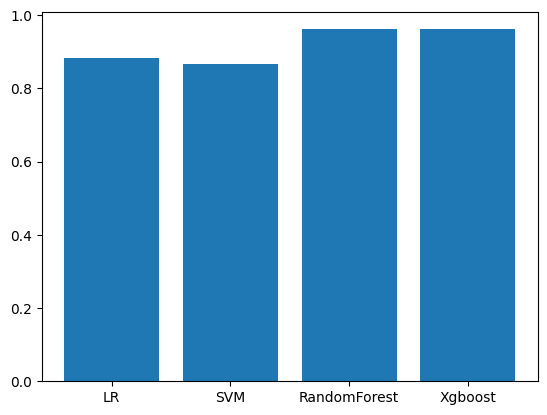

In [40]:
plt.bar(["LR" , "SVM" , "RandomForest" , "Xgboost"] , [accLR, accSVC, accRFC, accXGB])

In [41]:
# A1 = int(input("enter a1 score "))
# A2 = int(input("enter a2 score "))
# A3 = int(input("enter a3 score "))
# A4 = int(input("enter a4 score "))
# A5 = int(input("enter a5 score "))
# A6 = int(input("enter a6 score "))
# A7 = int(input("enter a7 score "))
# A8 = int(input("enter a8 score "))
# A9 = int(input("enter a9 score "))
# A10 = int(input("enter a10 score "))
# socialresponseiveness = int(input("enter social responsiveness score "))
# Age = int(input("enter age in years"))
# qchatscore= int(input("enter Qchat score "))
# speechdelay= int(input("enter speech delay or disorder present "))
# learningdisorder= int(input("enter learning disorder present "))
# geneticdisorder= int(input("enter genetic disorder present "))
# depression= int(input("enter depression present "))
# globaldevelopment= int(input("enter global development delay present "))
# behaviourissue= int(input("enter behaviour issue present "))
# anxietydisorder= int(input("enter anxiety disorder present "))
# gender= int(input("enter gender "))
# jaundice= int(input("enter jaundice present "))
# familymemberwithasd= int(input("enter family member with asd present "))

# inputdf = pd.DataFrame({
#     'A1': [A1],
#     'A2': [A2],
#     'A3': [A3],
#     'A4': [A4],
#     'A5': [A5],
#     'A6': [A6],
#     'A7': [A7],
#     'A8': [A8],
#     'A9': [A9],
#     'A10_Autism_Spectrum_Quotient': [A10],
#     'Social_Responsiveness_Scale': [socialresponseiveness],
#     'Age_Years': [Age],
#     'Qchat_10_Score': [qchatscore],
#     'Speech Delay/Language Disorder': [speechdelay],
#     'Learning disorder': [learningdisorder],
#     'Genetic_Disorders': [geneticdisorder],
#     'Depression': [depression],
#     'Global developmental delay/intellectual disability': [globaldevelopment],
#     'Social/Behavioural Issues': [behaviourissue],
#     'Anxiety_disorder': [anxietydisorder],
#     'Sex': [gender],
#     'Jaundice': [jaundice],
#     'Family_mem_with_ASD': [familymemberwithasd],      
# })

# print(LR.predict(inputdf))
# print(SVC.predict(inputdf))
# print(random.predict(inputdf))
# print(XGBo.predict(inputdf))

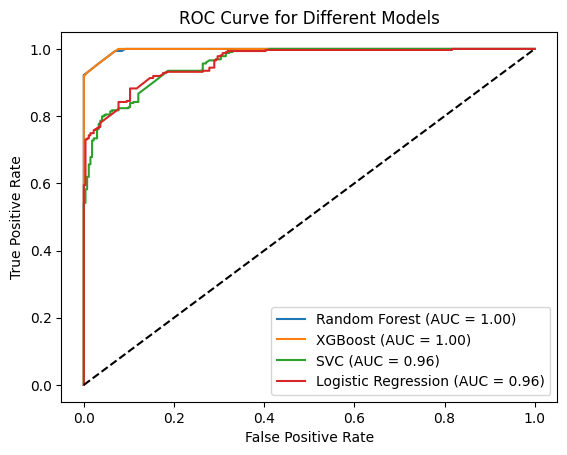

In [42]:
from sklearn.metrics import roc_curve , auc
plt.Figure(figsize=(8,6))

models = {
    'Random Forest': random,  
    'XGBoost': XGBo, 
    'SVC': SVC, 
    'Logistic Regression': LR
}

for name , model in models.items():
    y_prob= model.predict_proba(X_test)[:,-1]
    fpr , tpr , _ = roc_curve(Y_test,y_prob)
    auc_score = auc(fpr,tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')
    
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Different Models')
plt.legend()
plt.show()
    
    